## Great fot thick layer!

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="1"
os.environ["CUDA_VISIBLE_DEVICES"]=""
#force it out of GPU
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dropout
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

from scipy.special import erf

import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.reflect import SLD, MaterialSLD, ReflectModel, Component
from refnx.analysis import Objective, CurveFitter, Transform, possibly_create_parameter
from refnx.analysis import Parameter, Parameters
from refnx.reflect import SLD, Slab, Structure, ReflectModel

#np.random.seed(1)
%matplotlib inline

In [3]:

def data_load(path):
    data = np.loadtxt(path)
    data_q = data[:,1]*(data[:,0]**4)
    maximum, minimum = -11.367532016485333, -30.062217245183856 #normalization
    data_ex = (np.log(data_q)-minimum)/(maximum-minimum)
    data_ex = np.reshape(data_ex, (1, 256))
    return data_ex

In [4]:
#loading of the model
model = keras.models.load_model("DensNet_PTCDI.h5")

In [5]:
#prediction Pilatus
norm = np.load("normalization_PTCDI.npy", allow_pickle =True)

In [6]:
#prediction
labels = np.ones([1,7])
l_original = np.ones([7])
for j in tqdm(range(8)):
    for i in range(49):
        paths = "inter/curve"+str((j*100)+i)+".txt"
        data= data_load(paths)
        label = model.predict(data, verbose=0)
        data_P = np.loadtxt(paths)
        #print(data_P.shape)
        for k in range(7): 
            l_original[k] = label[:,k]*(norm[k,0]-norm[k,1])+norm[k,1]
        prediction = l_original
        labels = np.append(labels, label, axis=0)

        
    

100%|██████████| 8/8 [00:38<00:00,  4.78s/it]


In [7]:
labels_n = labels[1:,:] 
print(labels_n.shape)  

(392, 7)


In [8]:
l_original = np.ones([392,7])

for i in range(7): 
    l_original[:,i] = labels_n[:,i]*(norm[i,0]-norm[i,1])+norm[i,1]
#print(l_original)
#np.save(labels2_G1PG", l_original)
print(l_original.shape)

(392, 7)


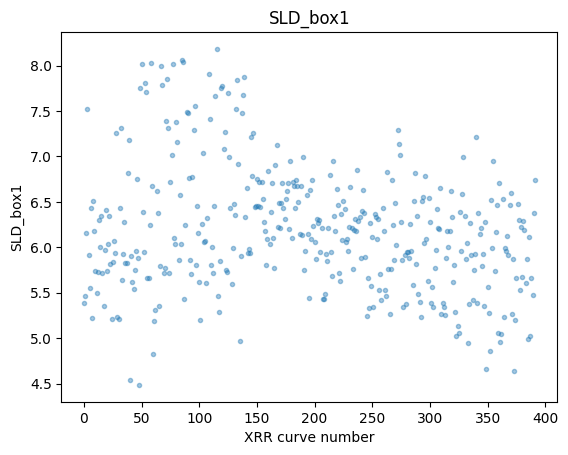

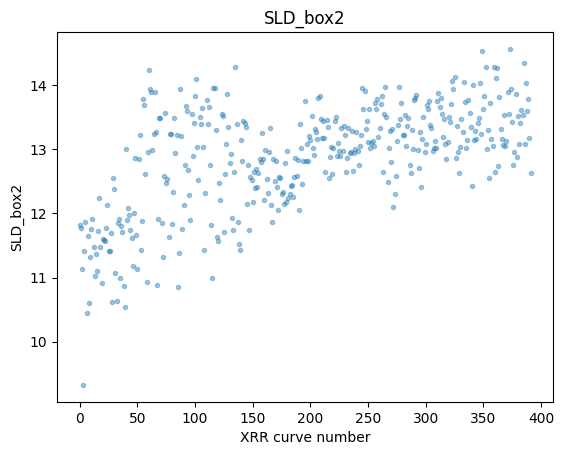

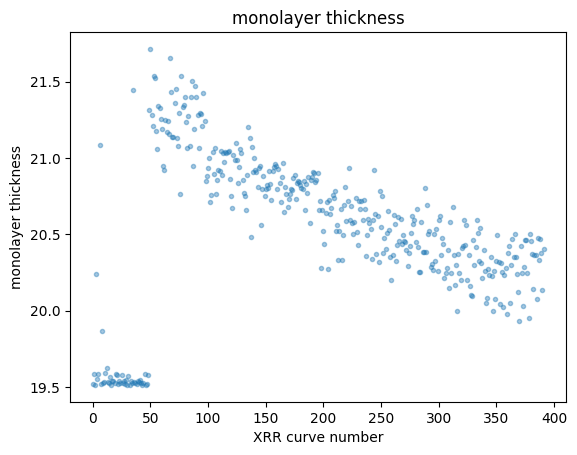

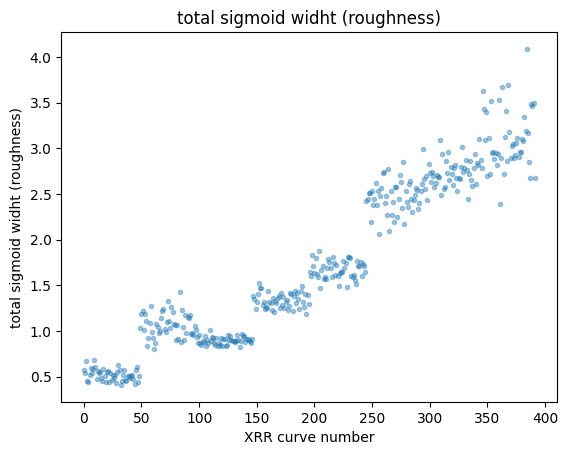

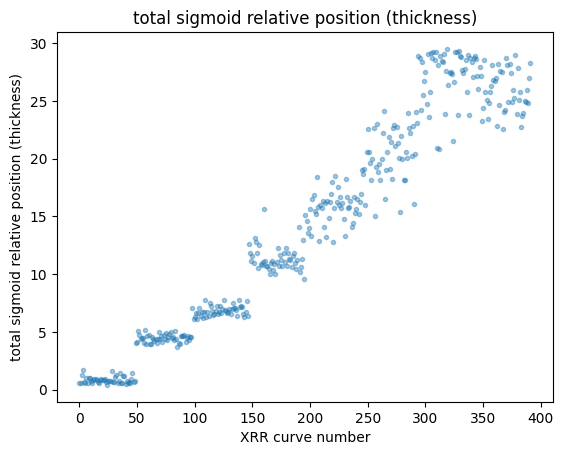

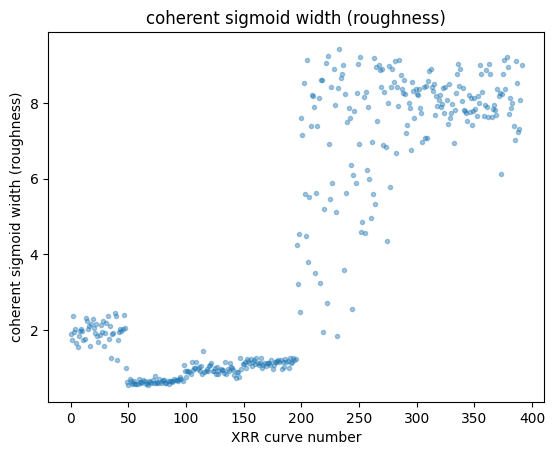

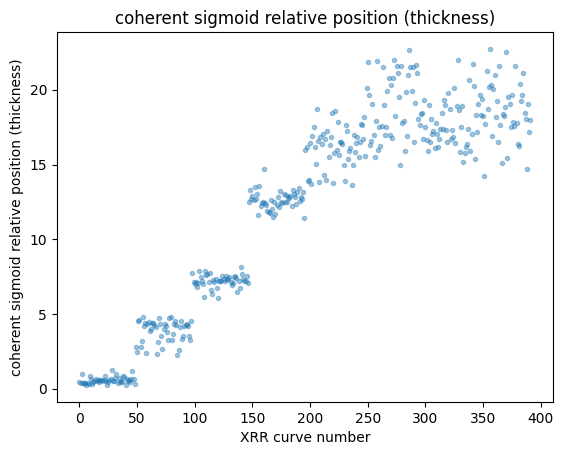

In [15]:
label = ['SLD_box1', 'SLD_box2', 'monolayer thickness', 'total sigmoid widht (roughness)',
         'total sigmoid relative position (thickness)','coherent sigmoid width (roughness)',
         'coherent sigmoid relative position (thickness)']

for i in range(7):
    plt.plot(l_original[:,i], '.', alpha=0.4)
    plt.title(label[i])
    plt.ylabel(label[i])
    plt.xlabel("XRR curve number")
    plt.show()
    